In [1]:
import requests
import json
import pandas as pd
import numpy as np


In [2]:
# import key from txt file
def get_key(path):
    with open(path) as f:
        key = f.readline()
    return key
eia_key = get_key('./secrets/eia_api.txt')

In [3]:
api_url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[product][]=EPCWTI&start=2014-01-01&end=2024-10-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={eia_key}'


response = requests.get(api_url)
wti_data = response.json()
#save data to json file
with open('./data/wti_data.json', 'w') as f:
    json.dump(wti_data, f)
    

In [5]:
#convert to dataframe
df = pd.DataFrame(wti_data['response']['data'])
df.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-10-01,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",70.41,$/BBL
1,2024-09-30,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.75,$/BBL
2,2024-09-27,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.72,$/BBL
3,2024-09-26,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.28,$/BBL
4,2024-09-25,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",70.42,$/BBL


In [6]:
df.describe()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
count,2698,2698,2698,2698,2698,2698,2698,2698,2698,2698,2698
unique,2698,1,1,1,1,1,1,1,1,2200,1
top,2024-10-01,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",52.19,$/BBL
freq,1,2698,2698,2698,2698,2698,2698,2698,2698,5,2698


In [7]:
df.dtypes

period                object
duoarea               object
area-name             object
product               object
product-name          object
process               object
process-name          object
series                object
series-description    object
value                 object
units                 object
dtype: object

In [8]:
#convert to datetime and numeric
df['period'] = pd.to_datetime(df['period'])
df['value'] = pd.to_numeric(df['value'])
df.describe()

,period,value
count,2698,2698.000000
mean,2019-05-13 06:24:49.103039232,64.692057
min,2014-01-02 00:00:00,-36.980000
25%,2016-09-05 06:00:00,49.100000
50%,2019-05-13 12:00:00,61.600000
75%,2022-01-12 18:00:00,78.560000
max,2024-10-01 00:00:00,123.640000
std,NaN,20.297565


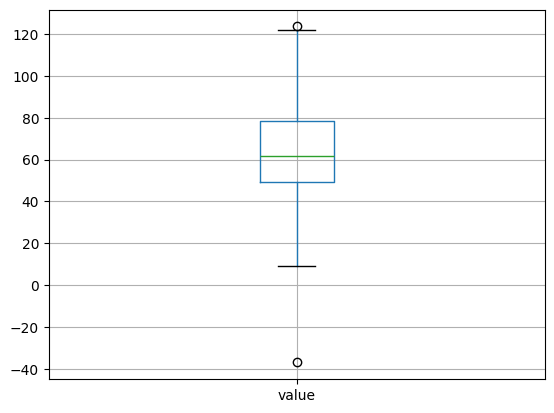

In [9]:
import matplotlib.pyplot as plt
df.boxplot(column='value')
plt.show()

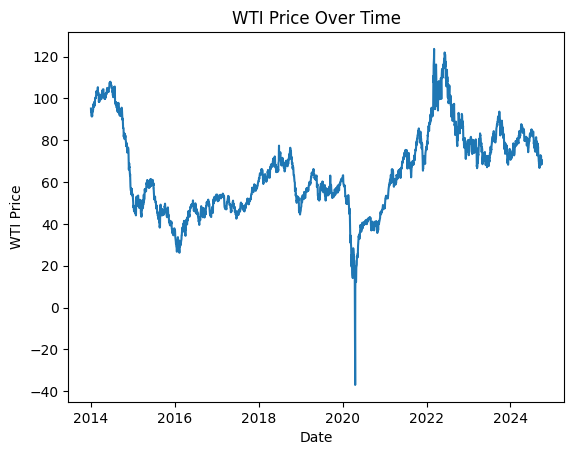

In [10]:
# plot the data
plt.plot(df['period'], df['value'])
plt.xlabel('Date')
plt.ylabel('WTI Price')
plt.title('WTI Price Over Time')
plt.show()


In [11]:
import yfinance as yf

tickers = ['XOM']
for ticker in tickers:
    ticker_yahoo = yf.Ticker(ticker)
    xom_data = ticker_yahoo.history(start="2014-01-01")
    xom_data.index = xom_data.index.strftime('%Y-%m-%d') # Format the date

In [12]:
xom_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2728.000000,2728.000000,2728.000000,2728.000000,2.728000e+03,2728.000000,2728.0
mean,66.569096,67.194836,65.941732,66.576627,1.696336e+07,0.012951,0.0
std,22.261880,22.484526,22.064019,22.284908,9.225710e+06,0.102902,0.0
min,26.103616,26.240034,24.161695,25.236975,3.851300e+06,0.000000,0.0
25%,54.844318,55.333629,54.424507,54.889795,1.061078e+07,0.000000,0.0
50%,59.388859,59.889431,58.965044,59.424179,1.439015e+07,0.000000,0.0
75%,72.186019,72.797884,70.648008,71.851364,2.018255e+07,0.000000,0.0
max,125.250000,126.339996,124.860001,125.370003,8.443940e+07,0.950000,0.0


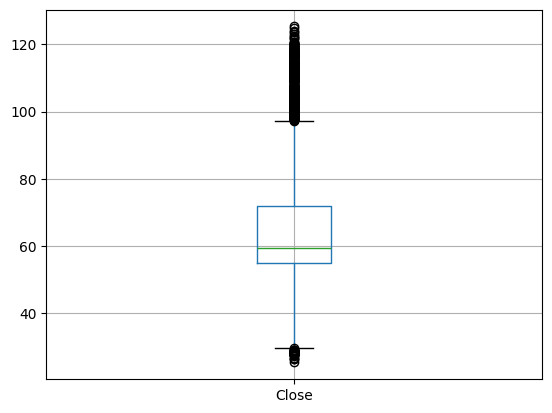

In [13]:
# boxplot
xom_data.boxplot(column='Close')
plt.show()


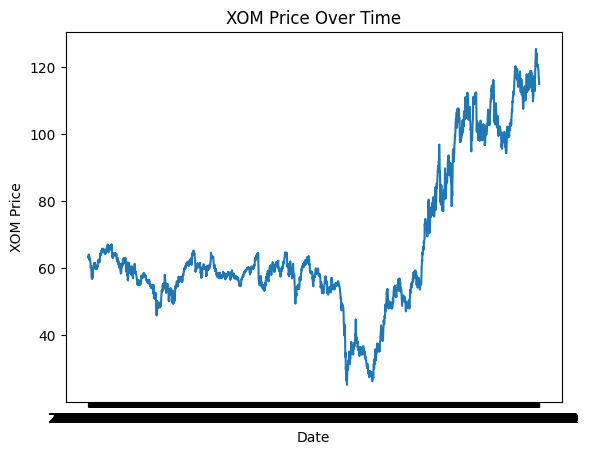

In [14]:
# plot the data
plt.plot(xom_data['Close'])
plt.xlabel('Date')
plt.ylabel('XOM Price')
plt.title('XOM Price Over Time')
plt.show()


In [15]:
#Join both dataframes

In [16]:
df.rename(columns={'period': 'Date'}, inplace=True)
df.head()

,Date,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-10-01,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",70.41,$/BBL
1,2024-09-30,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.75,$/BBL
2,2024-09-27,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.72,$/BBL
3,2024-09-26,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.28,$/BBL
4,2024-09-25,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",70.42,$/BBL


In [17]:
xom_data.reset_index(inplace=True)

In [18]:
# Join the dataframes
df = df.join(xom_data['Close'])
df.head()


,Date,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,Close
0,2024-10-01,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",70.41,$/BBL,63.254974
1,2024-09-30,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.75,$/BBL,63.102791
2,2024-09-27,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.72,$/BBL,63.197910
3,2024-09-26,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",68.28,$/BBL,64.092033
4,2024-09-25,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",70.42,$/BBL,63.882771


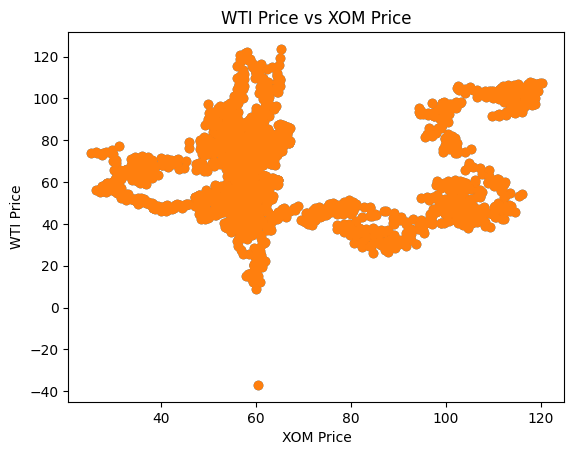

In [20]:
# scatter plot
plt.scatter(df['Close'], df['value'])
plt.xlabel('XOM Price')
plt.ylabel('WTI Price')
plt.title('WTI Price vs XOM Price')
plt.show()

